# Import Neccessory Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm #support vector machine
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

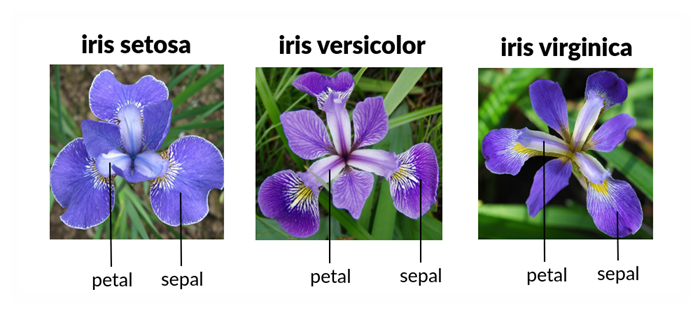

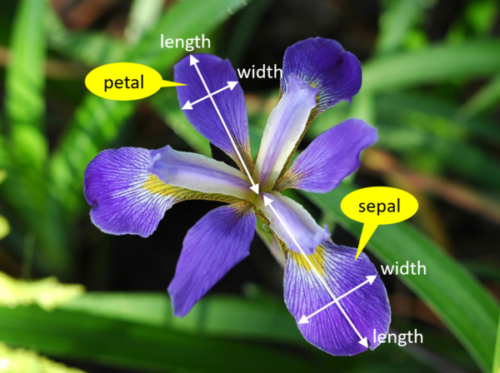

In [2]:
df= pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
species_list = []
for i in df['Species']:
    if i not in species_list:
        species_list.append(i)
species_list
    

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
group=df.groupby('Species')
group
for i,j in group: 
    print (i, j.shape) # finiding number groups in data  

Iris-setosa (50, 6)
Iris-versicolor (50, 6)
Iris-virginica (50, 6)


/Users/vidyaanvekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

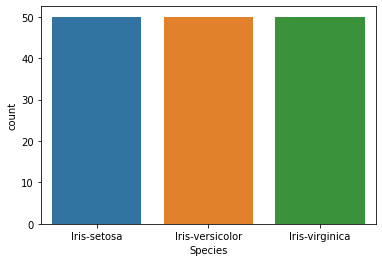

In [7]:
sns.countplot(df['Species'])

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
print (df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

/Users/vidyaanvekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

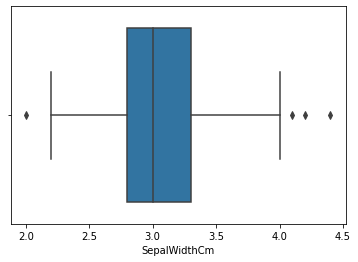

In [11]:
sns.boxplot(df['SepalWidthCm'])

# Outlier Treatment

In [12]:
df["SepalWidthCm"] = df["SepalWidthCm"].mask(df["SepalWidthCm"] >4, df["SepalWidthCm"].mean())
df["SepalWidthCm"] = df["SepalWidthCm"].mask(df["SepalWidthCm"] <2.1, df["SepalWidthCm"].mean())

In [13]:
df["SepalWidthCm"].mean()

3.0372827555555566

In [14]:
df['SepalWidthCm'].mode()

0    3.0
dtype: float64

In [15]:
df['SepalWidthCm'].median()

3.0

/Users/vidyaanvekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

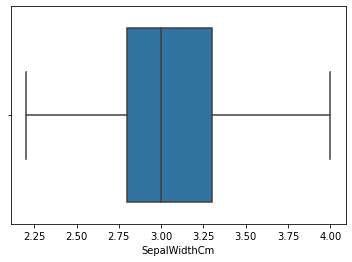

In [16]:
sns.boxplot(df['SepalWidthCm'])

In [17]:
corr=df.corr()
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.380118,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.113537,0.871754,0.817954
SepalWidthCm,-0.380118,-0.113537,1.000000,-0.391252,-0.325209
PetalLengthCm,0.882747,0.871754,-0.391252,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.325209,0.962757,1.000000


<AxesSubplot:>

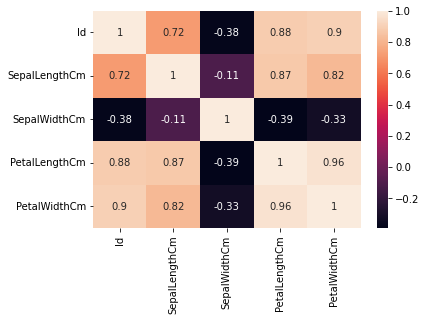

In [18]:
sns.heatmap(corr, annot=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [20]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
y_new=df['Species'] # Target coloum /feature/attribute/label
x_new=df.drop(['Species', 'Id'], axis=1) # through coloumn
print (x_new.head()) 
print ('\n\n')
y_new.head()

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2





0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

# Splitting data

In [22]:
x_train, x_test, y_train, y_test=train_test_split(x_new,y_new, test_size=0.2,random_state=10)
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2


In [23]:
print(len(x_train))
print()
print(len(x_test))

120

30


# Model 

In [24]:
from sklearn import svm #support vector machine # 1.step
svc_model=svm.SVC(kernel='rbf') # 2. step craeting object
svc_model

SVC()

In [25]:
svc_model.fit(x_train, y_train) #3. Training model 

SVC()

In [26]:
pred=svc_model.predict(x_test)
pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [27]:
df2=pd.DataFrame({'real':y_test, 'predicted': pred})
df2

,real,predicted
87,1,1
111,2,2
10,0,0
91,1,1
49,0,0
60,1,1
72,1,2
67,1,1
39,0,0
55,1,1


In [28]:
df2[df2['real']==1]

,real,predicted
87,1,1
91,1,1
60,1,1
72,1,2
67,1,1
55,1,1
66,1,1
53,1,1
85,1,1
61,1,1


In [29]:
len(df2)

30

In [30]:
confusion_matrix(pred, y_test)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]])

In [31]:
round(accuracy_score(pred, y_test)*100, 2)

96.67

In [32]:
from sklearn.metrics import recall_score, precision_score, f1_score
recall_score(pred,y_test, average='micro')*100

96.66666666666667

In [33]:
precision_score(pred,y_test,average='micro')*100

96.66666666666667

In [34]:
from sklearn.metrics import f1_score
f1_score(pred,y_test,average='weighted')*100

96.62222222222225

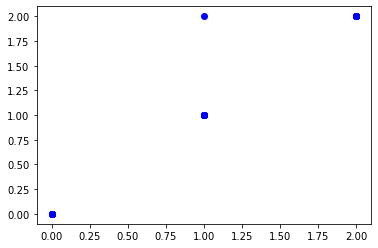

In [35]:
plt.scatter(df2['real'], df2['predicted'], color='blue')
plt.show()

In [36]:
df[51:55]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
51,52,6.4,3.2,4.5,1.5,1
52,53,6.9,3.1,4.9,1.5,1
53,54,5.5,2.3,4.0,1.3,1
54,55,6.5,2.8,4.6,1.5,1


# Confusion Matrix

In [37]:
confusion_matrix(pred, y_test)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]])

In [ ]:
sep_leng = float(input('sepal length'))
sep_width = float(input('sepal width'))
petal_leng =float(input('petal length'))
petal_width =float(input('petal width'))
real_prediction =svc_model.predict([[sep_leng, sep_width, petal_leng, petal_width]])
if real_prediction==0:
    print ('New instance is Iris setosa')
elif real_prediction==1:
    print ('New instance is Iris Verginica')
else:
    print ('New instance is Iris Versicolor')

In [ ]:
#real time problem 
real_pred= svc_model.predict([[5.4, 3.9, 1.7, 0.4], [6.4, 3.8, 2.4, 1.6], [6.2, 3.4, 5.4, 2.3], 
                             [6.3, 3.9, 5.0,2.1]])
real_pred 